In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import cv2
import os
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
data = []
target = []
categories = ["dogs", "cats"]
data_train_dir = r"F:\Machine Learning\course ML arabic Ahmed Rady\myCode\Projects\Dog and Cat Project\Dog and Cat\training_set\training_set"
for i in categories :
    path = os.path.join(data_train_dir,i)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        img = cv2.imread(img_path) 
        img = cv2.resize(img,(150,150))
        image = np.array(img).flatten()
        data.append(image)
        target.append(i)

In [3]:
flat_data = np.array(data)

In [4]:
data = pd.DataFrame(flat_data)
data["target"] = target

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,target
0,169,186,204,83,109,138,84,116,153,81,...,231,245,244,232,246,245,230,244,243,dogs
1,65,119,143,51,106,135,43,100,132,31,...,81,93,99,82,94,100,82,94,100,dogs
2,177,183,194,177,183,194,180,186,197,176,...,58,64,85,52,57,81,55,67,85,dogs
3,10,14,15,14,14,9,10,7,1,6,...,104,112,129,102,110,127,99,112,128,dogs
4,181,187,192,157,163,168,143,152,156,139,...,179,178,174,177,176,172,194,194,190,dogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000,50,47,53,61,62,68,91,100,104,138,...,208,222,218,208,222,218,208,222,218,cats
8001,175,174,170,171,170,166,177,176,172,177,...,120,137,124,120,134,122,120,132,120,cats
8002,155,157,171,191,194,211,108,115,132,161,...,158,157,153,127,126,122,113,113,113,cats
8003,242,234,241,240,232,239,237,229,236,233,...,224,232,239,221,229,236,221,229,236,cats


In [6]:
X = data.drop(["target"],axis=1)
y = data["target"]

In [7]:
pca = PCA(n_components=8000)
x_projected = pca.fit_transform(X)


In [8]:
x_projected.shape

(8005, 8000)

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(x_projected,y)
print(model.score(x_projected,y))

1.0


c:\Users\Mostfa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
test_data = []
target_test = []
categories = ["dogs", "cats"]
data_train_dir = r"F:\Machine Learning\course ML arabic Ahmed Rady\myCode\Projects\Dog and Cat Project\Dog and Cat\test_set\test_set"
for i in categories :
    path = os.path.join(data_train_dir,i)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        img = cv2.imread(img_path) 
        img = cv2.resize(img,(150,150))
        image = np.array(img).flatten()
        test_data.append(image)
        target_test.append(i)

In [11]:
flat_data_test = np.array(test_data)

In [12]:
test_data = pd.DataFrame(flat_data_test)
test_data["target_test"] = target_test
test_data

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,target_test
0,64,83,94,18,28,40,16,18,32,20,...,132,137,162,132,138,161,129,136,156,dogs
1,22,24,25,21,23,24,20,22,23,19,...,23,25,33,23,25,33,23,25,33,dogs
2,7,7,7,7,7,7,7,7,7,7,...,25,27,27,20,22,22,16,18,18,dogs
3,16,21,24,42,47,48,12,17,18,29,...,73,101,112,69,97,111,74,101,115,dogs
4,90,106,119,90,106,119,90,106,119,90,...,123,132,136,123,132,136,122,131,135,dogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,34,55,53,5,18,18,4,12,12,14,...,195,194,190,185,184,180,194,195,191,cats
2019,1,1,1,1,1,1,1,1,1,1,...,63,58,55,61,57,52,61,55,56,cats
2020,24,26,22,23,25,21,25,26,22,24,...,99,40,22,93,38,21,97,49,31,cats
2021,145,136,123,146,137,124,146,137,124,146,...,66,106,202,66,106,202,64,107,199,cats


In [13]:
X_test = test_data.drop("target_test",axis = 1)
y_test = test_data["target_test"]

In [14]:
x_test = pca.transform(X_test)

In [15]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,target_test
0,64,83,94,18,28,40,16,18,32,20,...,132,137,162,132,138,161,129,136,156,dogs
1,22,24,25,21,23,24,20,22,23,19,...,23,25,33,23,25,33,23,25,33,dogs
2,7,7,7,7,7,7,7,7,7,7,...,25,27,27,20,22,22,16,18,18,dogs
3,16,21,24,42,47,48,12,17,18,29,...,73,101,112,69,97,111,74,101,115,dogs
4,90,106,119,90,106,119,90,106,119,90,...,123,132,136,123,132,136,122,131,135,dogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,34,55,53,5,18,18,4,12,12,14,...,195,194,190,185,184,180,194,195,191,cats
2019,1,1,1,1,1,1,1,1,1,1,...,63,58,55,61,57,52,61,55,56,cats
2020,24,26,22,23,25,21,25,26,22,24,...,99,40,22,93,38,21,97,49,31,cats
2021,145,136,123,146,137,124,146,137,124,146,...,66,106,202,66,106,202,64,107,199,cats


In [16]:
x_test

array([[-1.20808998e+03, -2.68876919e+03,  6.04767503e+02, ...,
         9.97786258e+00,  1.53837033e+01, -1.44051154e+01],
       [-1.17114020e+04, -4.82252540e+03,  1.39292091e+03, ...,
        -1.71401447e+01, -9.66087009e+00, -6.52294906e+00],
       [-1.21006567e+04, -7.82813267e+03, -4.83917738e+03, ...,
         2.88383489e+01, -8.70924380e+00, -1.62534031e+00],
       ...,
       [-5.41506978e+02, -9.39909369e+03, -1.24897977e+03, ...,
         1.10323430e+01, -2.66819838e+01,  8.76708557e-01],
       [ 9.99717531e+02, -2.00266983e+02,  4.18224907e+03, ...,
        -1.58259031e+01, -1.49264606e+00, -4.43764793e+00],
       [ 8.07042827e+03,  5.06998232e+03, -1.84827380e+03, ...,
         6.83870013e+00, -8.77760564e+00,  1.10076075e+01]])

In [17]:
model.score(x_test,y_test)

0.5635195254572417

In [18]:
x_projected.shape

(8005, 8000)

In [19]:
x_test.shape

(2023, 8000)

In [20]:
model = RandomForestClassifier()
model.fit(x_projected,y)
print(model.score(x_projected,y))
print(model.score(x_test,y_test))

1.0
0.5299060800790905


In [21]:
X_inversed = pca.inverse_transform(x_projected)

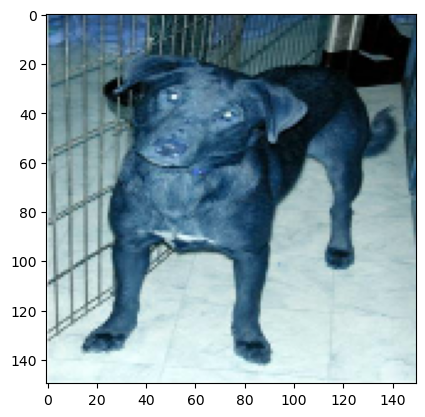

In [31]:
plt.imshow(X.values[0].reshape(150,150,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


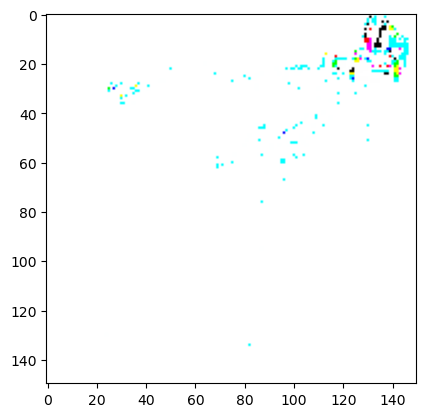

In [32]:
plt.imshow(X_inversed[0].reshape(150,150,3))